**WHERE SHOULD I LIVE?** <br>
Group Project of Programming for Data Science 2025/26 <br>
Angelica Lamberti 20250999 <br>
Samuel Nazzaro <br>
Efe <br>
Madeleine 

In [66]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

**1.  DATA WRANGLING AND ANALYSIS**

In [95]:
#Importing the data
data= pd.read_csv('city_data.csv', sep='|', header=1, parse_dates=['Last Data Update'])

print('Dimension of the data set:', data.shape) #The dataset has 86 rows and 14 columns
data.head()

Dimension of the data set: (86, 14)


,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17


**Exploratory Analysis**

**1** How did you handle missing values and duplicate records in the dataset? 

In [68]:
data.info()
#We have 80 missing values for Average Price Groceries, 
#1 for Population Density, 
#1 for Working Age Population, 
#1 for Unemployment Rate, 
#1 for GDP per Capita, 
#1 for Main Spoken Languages

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   City                             86 non-null     object        
 1   Population Density               85 non-null     float64       
 2   Population                       86 non-null     int64         
 3   Working Age Population           85 non-null     float64       
 4   Youth Dependency Ratio           86 non-null     float64       
 5   Unemployment Rate                85 non-null     float64       
 6   GDP per Capita                   85 non-null     float64       
 7   Days of very strong heat stress  86 non-null     int64         
 8   Main Spoken Languages            85 non-null     object        
 9   Average Monthly Salary           86 non-null     int64         
 10  Avgerage Rent Price              86 non-null     int64         


Since the Average Price Groceries column has more than 70% of missing values, it's not very meaningful to consider it. We can drop it and for this purpose a copy of the data is created: all the changes will be done on that copy ('data_copy').

In [69]:
data_copy=data.drop('Average Price Groceries', axis=1)
data_copy

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,2023-06-08


In [70]:
#Are there duplicate records?
data['City'].describe()

count                  86
unique                 84
top       Berlin. Germany
freq                    2
Name: City, dtype: object

In [71]:
data['City'].value_counts()

City
Berlin. Germany           2
Malaga, Spain             2
Vienna, Austria           1
Rotterdam, Netherlands    1
The Hague, Netherlands    1
                         ..
Madrid, Spain             1
Odense, Denmark           1
Copenhagen, Denmark       1
Hanover, Germany          1
Adana, Turkiye            1
Name: count, Length: 84, dtype: int64

'Berlin, Germany' and 'Malaga, Spain' appear twice in the dataset! Are them duplicates info?

In [87]:
#Check that info are the same
data.set_index('City').loc['Berlin. Germany']
data.set_index('City').loc['Malaga, Spain']

Population Density                               571.0
Population                                      869096
Working Age Population                        585608.0
Youth Dependency Ratio                            23.5
Unemployment Rate                                 17.7
GDP per Capita                                 27694.0
Days of very strong heat stress                      0
Main Spoken Languages                 Spanish, English
Average Monthly Salary                            2200
Avgerage Rent Price                               1312
Average Cost of Living                            1400
Average Price Groceries                            NaN
Last Data Update                   2023-11-27 00:00:00
Name: Malaga, Spain, dtype: object

Duplicates can be deleted from data_copy:

In [80]:
data.drop_duplicates(inplace=True)
data

,City,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Average Price Groceries,Last Data Update
0,"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,340.0,2024-06-15
1,"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,NaN,2023-11-03
2,"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,NaN,2023-04-22
3,"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,NaN,2024-08-09
4,"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,120.0,2023-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81,"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,NaN,2024-09-11
82,"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,NaN,2023-03-10
83,"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,NaN,2024-07-07
84,"Ankara, Turkiye",1922.0,4843511,3417691.0,30.0,14.4,38916.0,3,Turkish,900,450,900,309.0,2023-06-08


Since the 'City' columns contains 2 pieces of information, city and country, we want to split this column in 2 different columns: 1 for cities and the other for countries. In that way we can work on these information more easily.

**2.a** Which country appears most frequently in the dataset? How many cities are associated with it?

In [81]:
data_copy = data_copy.rename(columns={'City': 'city&country'}) 
data_copy[['city', 'country']] = data_copy['city&country'].str.split(',', expand=True)

countries_count = data_copy['country'].value_counts()
countries_count

country
Germany            9
Spain              6
Italy              6
Netherlands        5
United Kingdom     5
Belgium            4
Portugal           4
Sweden             3
Switzerland        3
Poland             3
Norway             3
Hungary            3
Austria            2
Ireland            2
Croatia            2
Turkiye            2
Czechia            2
Bulgaria           2
France             2
Finland            2
Denmark            2
Slovenia           1
Slovak Republic    1
Romania            1
Cyprus             1
Greece             1
Athens             1
Malta              1
Latvia             1
Luxembourg         1
 France            1
Estonia            1
Name: count, dtype: int64

Germany is the country that appears more frequently in the dataset, with a frequency of 9 times; so 9 cities are associated with Germany.

**2.b** How many cities are present in total? How many are associated with Greece? 

In [82]:
data['City'].describe()
#We can see that there are no more duplicates info

count                  84
unique                 84
top       Vienna, Austria
freq                    1
Name: City, dtype: object

In [83]:
data_copy.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86 entries, 0 to 85
Data columns (total 15 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   city&country                     86 non-null     object        
 1   Population Density               85 non-null     float64       
 2   Population                       86 non-null     int64         
 3   Working Age Population           85 non-null     float64       
 4   Youth Dependency Ratio           86 non-null     float64       
 5   Unemployment Rate                85 non-null     float64       
 6   GDP per Capita                   85 non-null     float64       
 7   Days of very strong heat stress  86 non-null     int64         
 8   Main Spoken Languages            85 non-null     object        
 9   Average Monthly Salary           86 non-null     int64         
 10  Avgerage Rent Price              86 non-null     int64         


In [84]:
city_list=data_copy['city'].tolist()
country_list=data_copy['country'].tolist()

There are some problems with the sintax: 'Athens' is in the country column and 'Greece' is in the city one.
Furthermore we need to expand some rows where the separator in the city column was not a ','.

In [85]:
data_copy[data_copy['country'].isnull()]
#In line 12 we have a ';' as a separator, and in the line 15 we have a '.'

,city&country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update,city,country
12,Lemesos;Cyprus,190.0,262238,173906.0,23.06,11.2,NaN,0,"Greek, English, Russian",2500,1400,2300,2023-08-14,Lemesos;Cyprus,None
15,Berlin. Germany,304.0,5303922,3481212.0,21.30,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,2023-06-29,Berlin. Germany,None
16,Berlin. Germany,304.0,5303922,3481212.0,21.30,4.7,46548.0,3,"German, Turkish, Arabic, English",3200,1220,2200,2023-06-29,Berlin. Germany,None


In [89]:
line_12_element=data_copy.iloc[12,0]
line_15_element=data_copy.iloc[15,0]
data_copy[['city', 'country']].iloc[12] = line_12_element.split(';')
data_copy[['city', 'country']].iloc[15] = line_15_element.split('.')
data_copy=data_copy.set_index('city&country').drop('Berlin. Germany', axis=0)
data_copy

/var/folders/dc/jfb4p3vj5q9dcq1f9lcgzl5c0000gn/T/ipykernel_1332/1185207185.py:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  data_copy[['city', 'country']].iloc[12] = line_12_element.split(';')
/var/folders/dc/jfb4p3vj5q9dcq1f9lcgzl5c0000g

,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update,city,country
city&country,,,,,,,,,,,,,,
"Vienna, Austria",310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15,Vienna,Austria
"Salzburg, Austria",243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03,Salzburg,Austria
"Brussels, Belgium",681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22,Brussels,Belgium
"Antwerp, Belgium",928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09,Antwerp,Belgium
"Gent, Belgium",552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17,Gent,Belgium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Stockholm, Sweden",334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11,Stockholm,Sweden
"Gothenburg, Sweden",245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10,Gothenburg,Sweden
"Malmo, Sweden",368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07,Malmo,Sweden


In [90]:
columns=data_copy.columns.to_list()
data_copy = data_copy[columns[-2:] + columns[:-2]]
data_copy
#Putting the city and country columns as the first and second ones 

,city,country,Population Density,Population,Working Age Population,Youth Dependency Ratio,Unemployment Rate,GDP per Capita,Days of very strong heat stress,Main Spoken Languages,Average Monthly Salary,Avgerage Rent Price,Average Cost of Living,Last Data Update
city&country,,,,,,,,,,,,,,
"Vienna, Austria",Vienna,Austria,310.0,2983513,2018818.0,20.1,10.2,55770.0,3,"German, English, Turkish, Serbian",2500,1050,2061,2024-06-15
"Salzburg, Austria",Salzburg,Austria,243.0,375489,250472.0,20.3,3.0,66689.0,0,German,3200,1100,2186,2023-11-03
"Brussels, Belgium",Brussels,Belgium,681.0,3284548,2137425.0,27.5,10.7,62500.0,3,"French, Dutch, Arabic, English",3350,1200,1900,2023-04-22
"Antwerp, Belgium",Antwerp,Belgium,928.0,1139663,723396.0,27.7,6.2,57595.0,3,"Dutch, French, Arabic",2609,900,1953,2024-08-09
"Gent, Belgium",Gent,Belgium,552.0,645813,417832.0,24.8,NaN,53311.0,2,"Dutch, French",2400,827,1200,2023-07-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Stockholm, Sweden",Stockholm,Sweden,334.0,2344124,1534225.0,28.5,6.2,70950.0,0,"Swedish, English",2700,1400,2300,2024-09-11
"Gothenburg, Sweden",Gothenburg,Sweden,245.0,1037675,672152.0,28.2,6.3,49588.0,0,"Swedish, English",2500,1200,2100,2023-03-10
"Malmo, Sweden",Malmo,Sweden,368.0,680335,436271.0,29.4,9.2,44387.0,0,"Swedish, English",2400,1100,2000,2024-07-07


In [91]:
data_copy[data_copy['country']==' Athens']
#row index 43
temp=data_copy.iloc[43,0]
data_copy.iloc[43,0]=data_copy.iloc[43,1]
data_copy.iloc[43,1]=temp
data_copy.iloc[43,:]
#Now Athens and Greece are in the right place 

city                                            Athens
country                                         Greece
Population Density                              1829.0
Population                                     3530371
Working Age Population                       2287174.0
Youth Dependency Ratio                            22.0
Unemployment Rate                                 17.2
GDP per Capita                                 38580.0
Days of very strong heat stress                     17
Main Spoken Languages                   Greek, English
Average Monthly Salary                            1050
Avgerage Rent Price                                600
Average Cost of Living                            1200
Last Data Update                   2024-07-16 00:00:00
Name: Greece, Athens, dtype: object

In [97]:
cities_sum = data_copy['city'].value_counts().sum()
print('In total there are ', cities_sum, 'cities')

cities_count=data_copy['country'].value_counts()
print(cities_count)

In total there are  84 cities


KeyError: 'country'

84 cities are present in total. 2 cities are associated with Greece: Athens and Zagreb

In [98]:
data_copy.set_index('country', inplace=True)
data_copy.index

KeyError: "None of ['country'] are in the columns"

**2.c** Which is the least spoken language in the dataset? Which are the top 3 most spoken languages? 

In [100]:
languages_count=data_copy['Main Spoken Languages'].str.split(', ').explode().value_counts()
languages_count
#I create a list with all the main spoken languages togheter and then I can count them 

Main Spoken Languages
English              46
German               13
French               10
Turkish               9
Dutch                 9
Italian               6
Spanish               5
Swedish               4
Polish                4
Greek                 4
Portuguese            4
Hungarian             3
Russian               3
Norwegian             3
Croatian              2
Urdu                  2
Irish Gaelic          2
Finnish               2
Danish                2
Czech                 2
Bulgarian             2
Arabic                2
Maltese               1
Latvian               1
Luxembourgish         1
Slovak                1
Romanian              1
  Arabic              1
Scots Gaelic          1
Scots                 1
Bengali               1
Estonian              1
Spanish;Valencian     1
Catalan               1
Serbian               1
Slovene               1
Name: count, dtype: int64

The top 3 most spoken languages are:
1. English (46)
2. German (14)
3. Turkish (10)
3. France (10)
   
The least spoken languages are: Sloven, Maltese, Latvian, Luxembourgish, Slovak, Romanian, Scots Gaelic, Scots, Bengali, Estonian, Valencian, Catalan and Serbian.

**3.a** Entries uploaded before April 2023 need to be updated. Which cities would require an update? 

In [102]:
begin_April_23=pd.to_datetime('2023-04-1')
filter=data_copy[data_copy['Last Data Update']< begin_April_23]
filter['city']
#Basel, Munich, Frankfurt am Main, Lyon, Venice and Gothenburg need an update

country
Switzerland                Basel
Germany                   Munich
Germany        Frankfurt am Main
 France                     Lyon
Italy                     Venice
Sweden                Gothenburg
Name: city, dtype: object

In [23]:
#b) How many days ago was the last update? On what day, month, and year did it occur? 
date_today= pd.Timestamp('today').normalize()
last_update=max(data_copy['Last Data Update'])
days= date_today-last_update
print(days)
#The last update was 341 days ago 
print(last_update)
#The last update was on 2024-12-12

344 days 00:00:00
2024-12-12 00:00:00


In [46]:
#4. a) How are the Unemployment Rate and GDP per Capita distributed and related? What does this relationship suggest?
unemployment_rate=data_copy['Unemployment Rate']
GDP_per_capita=data_copy['GDP per Capita']
unemployment_rate.mode() 
GDP_per_capita.mode()
# Provide a visual representation. 

0    46226.0
Name: GDP per Capita, dtype: float64

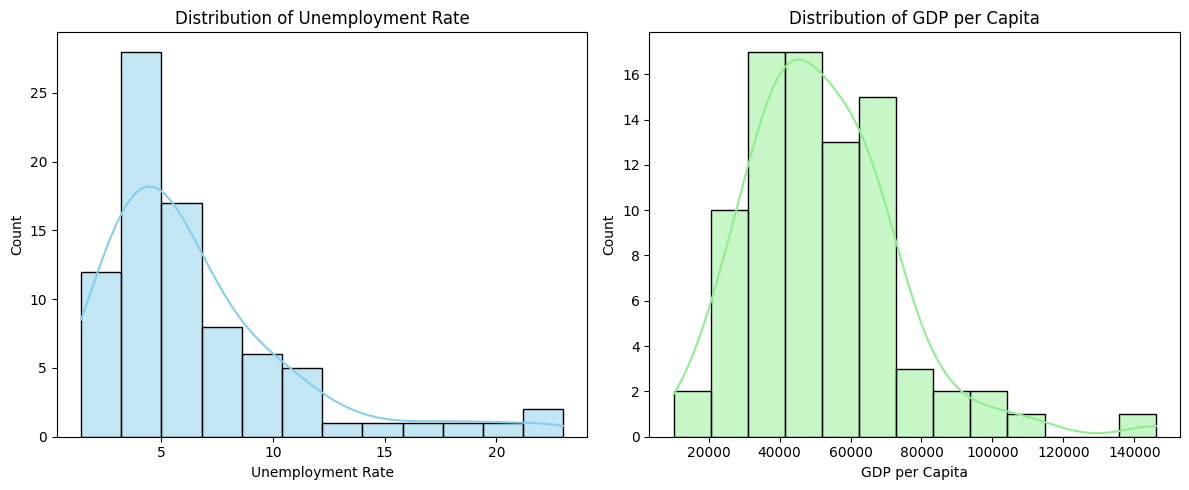

In [32]:
#How are Unemployement Rate and GDP per Capita distributed?
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(unemployment_rate, kde=True, color='skyblue')
plt.title('Distribution of Unemployment Rate')

plt.subplot(1,2,2)
sns.histplot(GDP_per_capita, kde=True, color='lightgreen')
plt.title('Distribution of GDP per Capita')

plt.tight_layout()
plt.show()

#At a first sight it can be seen that they have a similar distribution

ValueError: cannot reindex on an axis with duplicate labels

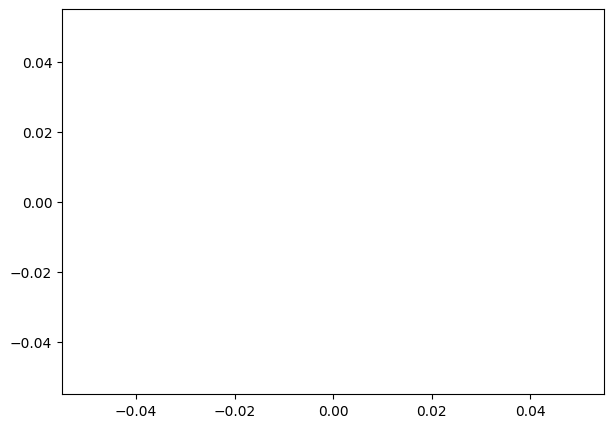

In [43]:
#Relationship between GDP per Capita and Unemployment Rate
plt.figure(figsize=(7,5))
sns.scatterplot(data=data_copy, x='GDP per Capita', y='Unemployment Rate')
sns.regplot(data=data_copy, x='GDP per Capita', y= 'Unemployment Rate', scatter=False, color='red')
plt.title('Relationship between GDP per Capita and Unemployment Rate')
plt.show()

In [33]:
#b) Which are the top 5 cities with the largest difference between the Average Monthly Salary and Average Cost of Living? 
# What about the top 5 countries with the smallest average difference? Show these results with meaningful visualizations. TO DO

In [ ]:
#c) Which is the best city for someone seeking:
#an average monthly salary above €2000,
#a cost of living below or equal to €1600, and
#a country suitable for starting a family (with a relatively larger youth population)? TO DO

In [ ]:
#5. What are three additional insights you find meaningful when comparing the given cities? TO DO 

In [ ]:
#2 INTRERACTIVE MAP 